In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score,f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sys import platform

labels={0:'clean',1:'high fry',2:'layered',3:'lowfry',4:'midfry',5:'no_vocals'}
# labels={0:'clean',1:'scream',2:'no vocal'}

In [2]:
n_class = '6class'

X_train=np.load(f'./resources/working_data/{n_class}_x_train-mfcc_only_unnormalized.npy',allow_pickle=True)
X_test=np.load(f'./resources/working_data/{n_class}_x_test-mfcc_only_unnormalized.npy',allow_pickle=True)
X_valid=np.load(f'./resources/working_data/{n_class}_x_valid-mfcc_only_unnormalized.npy',allow_pickle=True)

y_train_hot=np.load(f'./resources/working_data/{n_class}_y_train-mfcc_only_unnormalized.npy',allow_pickle=True)
y_test_hot=np.load(f'./resources/working_data/{n_class}_y_test-mfcc_only_unnormalized.npy',allow_pickle=True)
y_valid_hot=np.load(f'./resources/working_data/{n_class}_y_valid-mfcc_only_unnormalized.npy',allow_pickle=True)

y_train = np.argmax(y_train_hot,axis=1)
y_test = np.argmax(y_test_hot,axis=1)
y_valid = np.argmax(y_valid_hot,axis=1)
#df = pd.DataFrame(d,columns=feature_cols)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [3]:
def classwise_accuracy(cm):
    a=np.zeros(cm.shape)
    for i,x in enumerate(cm):
        a[i]=x/sum(x)
    return a

In [4]:
def eval_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    macro_acc = balanced_accuracy_score(y_test,y_pred)
    classwise_acc = classwise_accuracy(cm)
    return(cm,acc,f1,macro_acc,classwise_acc)

# kNN

Overall Accuracy Score: 0.3286384976525822
Macro Accuracy: 0.3313103819186378
Class-wise accuracy: 
[[0.44067797 0.24293785 0.04519774 0.03389831 0.1920904  0.04519774]
 [0.125      0.48214286 0.07142857 0.07142857 0.17857143 0.07142857]
 [0.33870968 0.26209677 0.15322581 0.06048387 0.18145161 0.00403226]
 [0.11940299 0.32835821 0.10447761 0.         0.44776119 0.        ]
 [0.21153846 0.37179487 0.1025641  0.03846154 0.25641026 0.01923077]
 [0.08783784 0.15540541 0.00675676 0.02027027 0.07432432 0.65540541]]


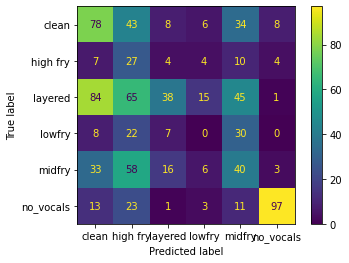

In [5]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,KNN_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# SVM

Overall Accuracy Score: 0.42018779342723006
Macro Accuracy: 0.41059256468337363
Class-wise accuracy: 
[[0.57062147 0.05649718 0.03954802 0.07909605 0.22033898 0.03389831]
 [0.125      0.46428571 0.08928571 0.01785714 0.19642857 0.10714286]
 [0.2983871  0.25806452 0.2016129  0.11290323 0.11290323 0.01612903]
 [0.         0.1641791  0.11940299 0.04477612 0.67164179 0.        ]
 [0.09615385 0.27564103 0.17948718 0.03846154 0.37820513 0.03205128]
 [0.07432432 0.06081081 0.02027027 0.02027027 0.02027027 0.80405405]]


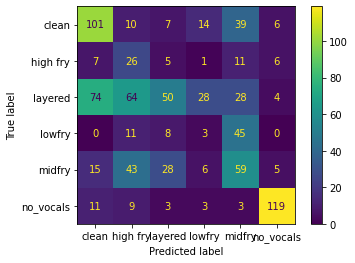

In [6]:
SVM_model = SVC(gamma='scale',C=1.0533, kernel='poly', degree=2,coef0=2.1,random_state=42)
SVM_model.fit(X_train, y_train)

SVM_prediction = SVM_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,SVM_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# RF

Overall Accuracy Score: 0.3767605633802817
Macro Accuracy: 0.389145506320192
Class-wise accuracy: 
[[0.51412429 0.24293785 0.00564972 0.02824859 0.18644068 0.02259887]
 [0.125      0.51785714 0.05357143 0.01785714 0.19642857 0.08928571]
 [0.23790323 0.38709677 0.0483871  0.08870968 0.21774194 0.02016129]
 [0.01492537 0.28358209 0.02985075 0.         0.67164179 0.        ]
 [0.1025641  0.3525641  0.06410256 0.04487179 0.41666667 0.01923077]
 [0.05405405 0.05405405 0.         0.02027027 0.03378378 0.83783784]]


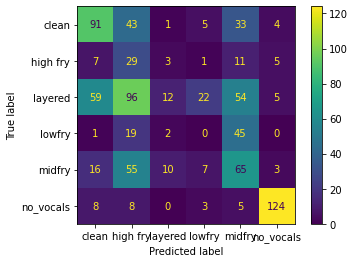

In [7]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,RF_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()